# Домашнее задание №1

Задание выполнил(а): FIO


__Дата выдачи:__ 19.12.2020

__Дедлайн:__ 27.12.2020 23:59

# О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками `numpy`, `pandas` и `matplotlib`.

### Оценивание и штрафы

Каждое из 14 заданий весит 1 бал:
#### Numpy
* [Задание 1](#task1) [1 бал]
* [Задание 2](#task2) [1 бал]
* [Задание 3](#task3) [1 бал]
* [Задание 4](#task4) [1 бал]
* [Задание 5](#task5) [1 бал]

#### Pandas
* [Задание 6](#task6) [1 бал]
* [Задание 7](#task7) [1 бал]
* [Задание 8](#task8) [1 бал]
* [Задание 9](#task9) [1 бал]
* [Задание 10](#task10) [1 бал]
* [Задание 11](#task11) [1 бал]
* [Задание 12](#task12) [1 бал]

#### Matplotlib
* [Задание 13](#task13) [1 бал]
* [Задание 14](#task14) [1 бал]


Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{14},$$ где $s$ - сумма набранных балов.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

```TBA```

## Часть 1. Numpy

In [1]:
import numpy as np

Во всех задачах этой части необходимо написать код решения внутри функции и проверить его работу на приведенных для вашего удобства тестах.

При решении задач можно использовать только библиотеку `numpy`. Запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде предполагается, что массив - это одномерный `numpy.array`, а матрица - это двумерный `numpy.array`. 

### Задание 1 <a id="task1"></a>

Создайте массив первых n нечетных натуральных чисел, записанных в порядке убывания. Например, если `n=5`, то ответом будет `array([9, 7, 5, 3, 1])`.

*Функции, которые могут пригодиться при решении: `.arange()`*

In [38]:
def first_even_numbers(n: int) -> np.array:
#     massive = [n for n in range(1, n+1, 2)]
    massive = np.arange(n*2 - 1, 0 , -2)
    return massive

In [39]:
assert np.allclose(first_even_numbers(5), np.array([9, 7, 5, 3, 1]))
assert np.allclose(first_even_numbers(1), np.array([1]))
assert np.allclose(first_even_numbers(10), np.array([19, 17, 15, 13, 11, 9, 7, 5, 3, 1]))

### Задание 2 <a id="task2"></a>

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

*Функции, которые могут пригодиться при решении: `.arange()`*

In [40]:
def change_array(array: np.array, number: int) -> np.array:
    array[np.arange(0, len(array), 3)] = number
    return array

In [41]:
array1 = np.array([3, 5, 1, 0, -3, 22, 213436])
number1 = -111
assert np.allclose(change_array(array1, number1), np.array([-111, 5, 1, -111, -3, 22, -111]))

array2 = np.array([3, 14, 15, 92, 6])
number2 = 8
assert np.allclose(change_array(array2, number2), np.array([8, 14, 15, 8, 6]))

### Задание 3 <a id="task3"></a>

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

_Функции, которые могут пригодиться при решении: `.mean()`, `.std()`, `.nan_to_num()`_

In [42]:
def normalize(matrix: np.array) -> np.array:
    mean = matrix.mean(axis=0)
    std = matrix.std(axis=0)
    the_matrix = np.nan_to_num((matrix-mean)/std)
    return the_matrix

In [43]:
matrix1 = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
assert np.allclose(
    normalize(matrix1),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)
matrix2 = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])
assert np.allclose(
    normalize(matrix2),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)
matrix3 = np.array([[0.1, 0.2, 0.3, 0.4], [0.1, 0.5, 0.6, 0.7]])
assert np.allclose(
    normalize(matrix3),
    np.array([[0, -1, -1, -1], [0, 1, 1, 1]])
)

<ipython-input-42-af4ae4e51954>:4: RuntimeWarning: invalid value encountered in true_divide
  the_matrix = np.nan_to_num((matrix-mean)/std)


### Задание 4 <a id="task4"></a>

Напишите функцию, вычисляющую производную данного полинома. Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([12, 12, 0])`, соответствующий полиному $12x^2 + 12x$.

_Функции, которые могут пригодиться при решении: `.arange()`_

In [44]:
def derivative(coefs: np.array) -> np.array:
    coefs[np.arange(0, len(coefs), 1)] = coefs*(np.arange((len(coefs)-1), -1, -1))
    return coefs[:-1]

In [45]:
coefs1 = np.array([4, 6, 0, 1])
assert np.allclose(
    derivative(coefs1),
    np.array([12, 12, 0])
)

coefs2 = np.array([1, 7, -12, 21, -6])
assert np.allclose(
    derivative(coefs2),
    np.array([4, 21, -24, 21])
)

### Задание 5 <a id="task5"></a>

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

_Функции, которые могут пригодиться при решении: `.T`, `.identity()`, `.diagonal`_

На входе метода np.where подаются три матрицы: первая - некий шаблон результирующей матрицы, элементам которой присваиваются значения True и False (True в нашем случае присваивается ненулевым значениям, False - нулевым).
В результирующей матрице элементы True заполняются соответствующими элементами второй матрицы, а элементы False - третьей матрицы). 
Для нашего случая и шаблоном, и True-матрицей будет служить исходная верхнетреугольная матрица, а False-матрицей - она же, но транспонированная.

In [11]:
def make_symmetric(matrix: np.array) -> np.array:
    the_matrix = np.where(matrix, matrix, matrix.T)
    return the_matrix

In [12]:
matrix1 = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
assert np.allclose(
    make_symmetric(matrix1),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

matrix2 = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])
assert np.allclose(
    make_symmetric(matrix2),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

## Часть 2. Pandas

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

### Задание 6 <a id="task6"></a>

Откройте в ноутбуке файл с данными (["train.csv"](https://raw.githubusercontent.com/AKuzina/ml_dpo/main/hw/train.csv)). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [47]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
# 891 строк * 12 столбцов, необходимые данные выше

### Задание 7 <a id="task7"></a>

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [16]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
# Доля выживших
survived = len(df[df['Survived'] == 1])
print(f'{round(survived*100/len(df), 2)}%')

38.38%


In [18]:
survived_sex = df.Sex[df['Survived'] == 1]
commom_survived = len(survived_sex)
survived_sex = survived_sex.value_counts()
survived_sex

female    233
male      109
Name: Sex, dtype: int64

In [48]:
print(f'Всего выжило {commom_survived} человека')
print(f'выживших женщин - {round(survived_sex.female*100/commom_survived)}%')
print(f'выживших мужчин - {round(survived_sex.male*100/commom_survived)}%')

Всего выжило 342 человека
выживших женщин - 68%
выживших мужчин - 32%


### Задание 8 <a id="task8"></a>

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [20]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Максимум - 512,32
Минимум - бесплатно
Средняя - 32,2

Есть три возможных значения для Embarked -  Саутгемптон (Southampton), Шербург (Cherbourg) и Куинстаун (Queenstown). 

In [21]:
df.Fare[df['Embarked'] == 'S'].describe()

count    644.000000
mean      27.079812
std       35.887993
min        0.000000
25%        8.050000
50%       13.000000
75%       27.900000
max      263.000000
Name: Fare, dtype: float64

Максимум - 263
Минимум - бесплатно
Средняя - 27,08

### Задание 9 <a id="task9"></a>

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Номер билета и кабины вряд ли мог внести свой вклад в выживаемость пассажира -- уберем данные столбцы

In [22]:
df.drop(columns=['Ticket', 'Cabin'], inplace=True)

### Задание 10 <a id="task10"></a>

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [4]:
df.info()

NameError: name 'df' is not defined

Из info видно, что пропуски в столбце 'Age' (177) и 'Embarked'(2). Раньше были пропуски в столбце 'Cabin'(687), но я его удалил навсегда.

### Задание 11 <a id="task11"></a>

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

#### Embarked

In [24]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Наибольшее количество пассажиров село в Саутгемптоне. Значит, наибольшая вероятность того, что эти два пассажира сели именно там. Поэтому присвоим пустым значениям метку этого города (S)

In [53]:
df.Embarked.fillna(value = 'S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

#### Age

<AxesSubplot:>

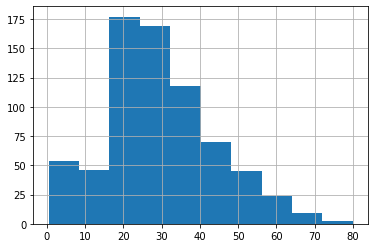

In [26]:
df.Age.hist()

In [27]:
# Cперва классифицировал людей на основе их имени. 
# C помощью строковых методов Python извлек префикс для обращений (например, Mr, Miss, Mrs) из каждого имени

df['Salutation'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
df.drop(columns=['Name']) # Удалил столбец имён за дальнейшей ненадобностью

# Затем я сгруппировал эти названия по Sex и PClass и вычислил мединные значения возраста.
grp = df.groupby(['Sex', 'Pclass'])
right = grp.Age.apply(lambda x: x.fillna(x.median()))
print(right)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [54]:
# Теперь заменил колонку возраста вычисленной колонкой (у меня не получается почему-то сделать методом fillna)
df.Age = right
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Совершенно мне непонятно, почему fillna не применилась опять к Embarked (2 значения не добавились). 
Только замена колонки позволяет сделать как надо. Делаю:

In [29]:
df.Embarked = df.Embarked.fillna('S')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Salutation   891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Наконец-то, все данные заполнены. Странно, раньше у меня с fillna не было проблем. Я пробовал для вариантов замены писать и (values = ), и axis...

### Задание 12 <a id="task12"></a>

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. 

SibSp — это число братьев, сестер или супругов на борту у человека. Максимум 8 братьев и сестер путешествовали вместе с одним из путешественников.
Подобно SibSp, этот признак содержал количество родителей или детей, с которыми путешествовал каждый пассажир. 
Для хранения суммарных значений «Parch» и «SibSp» добавим  столбец «Family», на забыв прибавить единицу, чтобы включить самого пассажира.

In [31]:
df['Family'] = df.Parch + df.SibSp + 1

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Salutation   891 non-null    object 
 11  Family       891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


# Часть 3. Matplotlib

### Задание 13 <a id="task13"></a>

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию [`plt.subplots`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html).

* Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots` 
* Используйте функции `set_xlabel`, `set_ylabel`, `set_title` чтобы добавить подписи осей и названия графикам
* Для построения гистограммы используйте функуию [`hist`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)
* Каждая гистограмма должна быть нормирована (полезными могут оказаться параметры `density`)


В итоге ваш график должен выглядеть примерно так

![](plot_13.png)

Text(0.5, 0, 'Age')

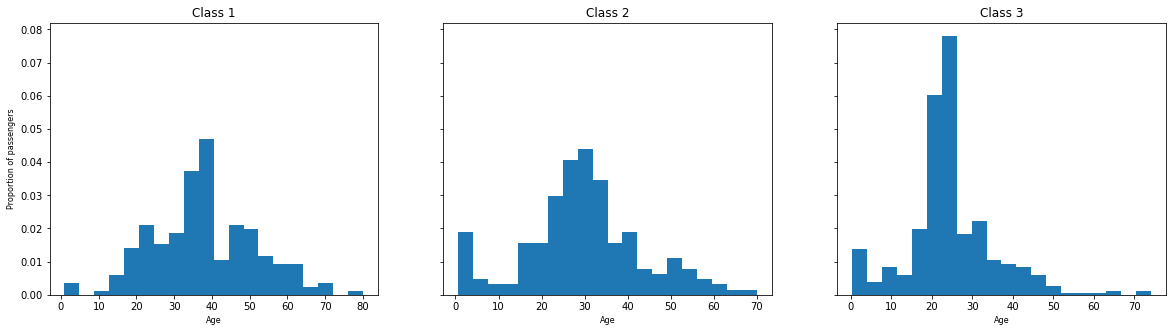

In [33]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
ax[0].hist(df.Age[df['Pclass'] == 1], bins = 20, density = True)
ax[0].set_title('Class 1')
ax[0].set_xlabel('Age', fontsize = 8)
ax[0].set_ylabel('Proportion of passengers', fontsize=8)
ax[1].hist(df.Age[df['Pclass'] == 2], bins = 20, density = True)
ax[1].set_title('Class 2')
ax[1].set_xlabel('Age', fontsize = 8)
ax[2].hist(df.Age[df['Pclass'] == 3], bins = 20, density = True)
ax[2].set_title('Class 3')
ax[2].set_xlabel('Age', fontsize = 8)

Попробуем ещё один способ

Text(0.5, 1.0, 'Class 3')

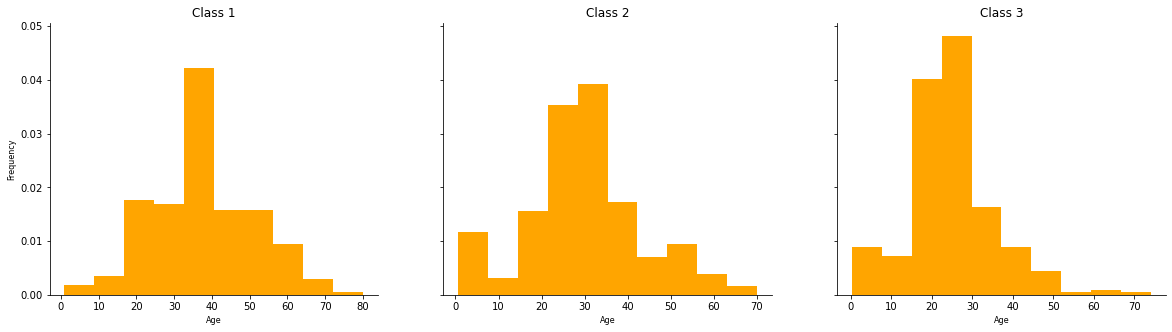

In [34]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)

for x in range(3):
    ax[x].set_xlabel('Age', fontsize = 8)
    ax[x].set_ylabel('Proportion of passengers', fontsize=8)
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)

df.Age[df['Pclass'] == 1].plot(kind='hist', ax=ax[0], color = 'orange', density=True)
ax[0].set_title('Class 1')

df.Age[df['Pclass'] == 2].plot(kind='hist', ax=ax[1], color = 'orange', density=True)
ax[1].set_title('Class 2')

df.Age[df['Pclass'] == 3].plot(kind='hist', ax=ax[2], color = 'orange', density=True)
ax[2].set_title('Class 3')

In [36]:
# Странно, получились немного другие графики

### Задание 14 <a id="task14"></a>

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. 

* Обозначьте выживших и погибших пассажиров (`Survived`) разными цветами (аргумент `c` функции `scatter`) и маркерами (аргумент `c` функции `marker`). 
* Также укажите на графике легенду (функция [`plt.legend`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html))
* Используйте аргумент `fontsize`, чтобы регулировать размер шрифта в подписях

В итоге ваш график должен выглядеть примерно так

![](plot_14.png)

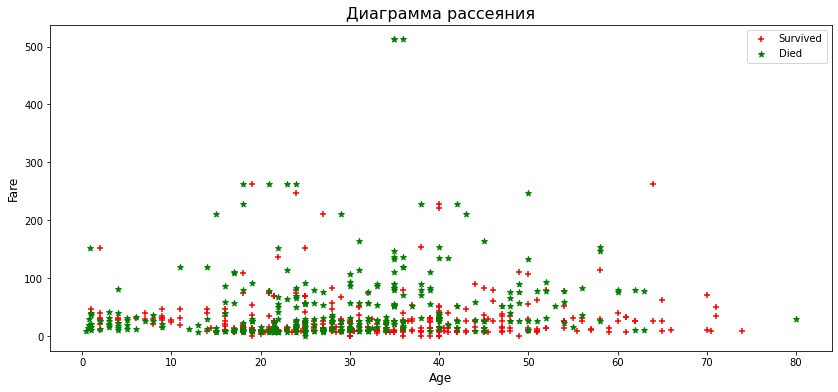

In [35]:
fig, ax = plt.subplots()
ax.set_title('Диаграмма рассеяния', fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Fare", fontsize=12)
plt.scatter(df.Age[(df["Survived"] == 0)], df.Fare[(df["Survived"] == 0)], c="red", marker='+')
plt.scatter(df.Age[(df["Survived"] == 1)], df.Fare[(df["Survived"] == 1)], c="green", marker='*')
fig.set_figwidth(14)
fig.set_figheight(6)
ax.legend(["Survived", "Died"])